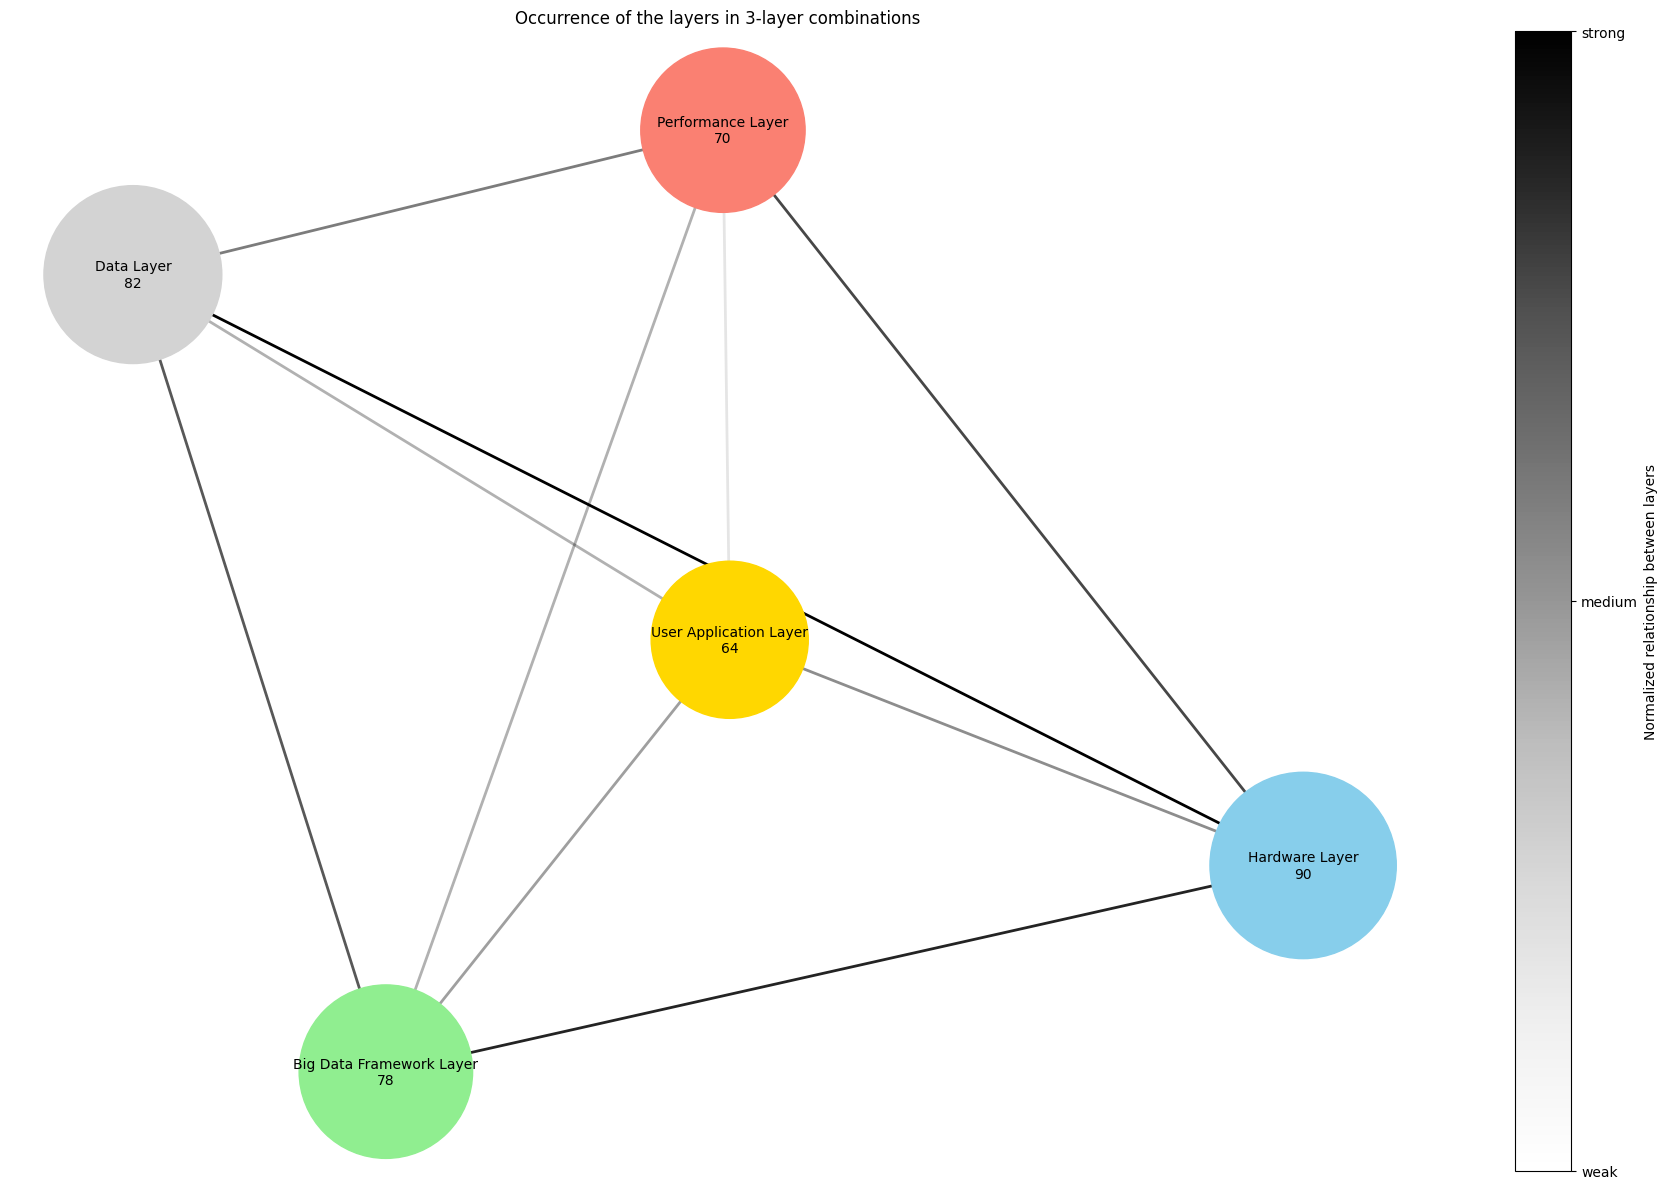

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import networkx as nx

daten = [
    (('Hardware Layer', 'Performance Layer', 'Data Layer'), 10),
    (('Hardware Layer', 'Big Data Framework Layer', 'Data Layer'), 10),
    (('Hardware Layer', 'Big Data Framework Layer', 'Performance Layer'), 7),
    (('Hardware Layer', 'Big Data Framework Layer', 'User Application Layer'), 7),
    (('Hardware Layer', 'Data Layer', 'User Application Layer'), 6),
    (('Big Data Framework Layer', 'Data Layer', 'User Application Layer'), 6),
    (('Hardware Layer', 'Performance Layer', 'User Application Layer'), 5),
    (('Big Data Framework Layer', 'Performance Layer', 'Data Layer'), 5),
    (('Performance Layer', 'Data Layer', 'User Application Layer'), 4),
    (('Big Data Framework Layer', 'Performance Layer', 'User Application Layer'), 4),
    #(('Virtualisation Layer', 'Performance Layer', 'Data Layer'), 3),
    #(('Hardware Layer', 'Virtualisation Layer', 'Performance Layer'), 2),
    #(('Hardware Layer', 'Virtualisation Layer', 'Data Layer'), 2),
    #(('Virtualisation Layer', 'Big Data Framework Layer', 'Performance Layer'), 2),
    #(('Hardware Layer', 'Virtualisation Layer', 'User Application Layer'), 1),
    #(('Virtualisation Layer', 'Performance Layer', 'User Application Layer'), 1),
    #(('Virtualisation Layer', 'Data Layer', 'User Application Layer'), 1),
    #(('Virtualisation Layer', 'Big Data Framework Layer', 'Data Layer'), 1),
]

# Netzwerkdiagramm erstellen
G_agg = nx.Graph()

# Knotenhäufigkeit berechnen
knoten_haeufigkeit_combined = {node: 0 for tupel, gewicht in daten for node in tupel}

# Aggregierte Gewichte berechnen
for tupel, gewicht in daten:
    for i in range(len(tupel) - 1):
        for j in range(i+1, len(tupel)):
            if G_agg.has_edge(tupel[i], tupel[j]):
                G_agg[tupel[i]][tupel[j]]['weight'] += gewicht
            else:
                G_agg.add_edge(tupel[i], tupel[j], weight=gewicht)
            knoten_haeufigkeit_combined[tupel[i]] += gewicht
            knoten_haeufigkeit_combined[tupel[j]] += gewicht

# Farbcodierung für die Schichten
layer_colors = {
    'Hardware Layer': 'skyblue',
    'Big Data Framework Layer': 'lightgreen',
    'Performance Layer': 'salmon',
    'User Application Layer': 'gold',
    'Virtualisation Layer': 'violet',
    'Data Layer': 'lightgrey'
}
colors_agg = [layer_colors[node] for node in G_agg.nodes()]

# Knotenhäufigkeit und Namen zusammenfügen
knoten_labels_combined = {node: f"{node}\n{knoten_haeufigkeit_combined[node]}" for node in G_agg.nodes()}

# Knotengrößen anpassen
knoten_groessen_combined = [knoten_haeufigkeit_combined[node] * 200 for node in G_agg.nodes()]

# Verbessertes Layout
pos_agg = nx.kamada_kawai_layout(G_agg)

# Normalisierte Gewichte für Transparenz
gewichte = [d['weight'] for (u, v, d) in G_agg.edges(data=True)]
min_gewicht = min(gewichte)
max_gewicht = max(gewichte)
normalisierte_gewichte = [1 + 9 * (gewicht - min_gewicht) / (max_gewicht - min_gewicht) for gewicht in gewichte]
alpha_werte_korrekt = [0.1 + 0.9 * (gewicht - min(normalisierte_gewichte)) / (max(normalisierte_gewichte) - min(normalisierte_gewichte)) for gewicht in normalisierte_gewichte]

# Diagramm zeichnen
plt.figure(figsize=(20, 12))

# Kanten zeichnen mit angepassten Alpha-Werten
for (u, v), alpha in zip(G_agg.edges(), alpha_werte_korrekt):
    nx.draw_networkx_edges(G_agg, pos_agg, edgelist=[(u, v)], alpha=alpha, width=2)

# Knoten zeichnen
nx.draw_networkx_nodes(G_agg, pos_agg, node_size=knoten_groessen_combined, node_color=colors_agg)

# Beschriftungen hinzufügen
nx.draw_networkx_labels(G_agg, pos_agg, labels=knoten_labels_combined, font_size=10)

# Farbleiste hinzufügen
ticks = [min_gewicht, (max_gewicht + min_gewicht) / 2, max_gewicht]
tick_labels = ['weak', 'medium', 'strong']
cbar = plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(vmin=min_gewicht, vmax=max_gewicht), cmap='Greys'), 
                    ax=plt.gca(), ticks=ticks)
cbar.set_label('Normalized relationship between layers')
cbar.ax.set_yticklabels(tick_labels)

# plt.title('Occurrence of the layers in 3-layer combinations')
plt.axis('off')
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

